# Clustering

Clustering is an **unsupervised learning technique** used to group data points that are similar to each other. 
Unlike supervised learning, clustering **does not use labels**; it discovers patterns in the data automatically.

### Applications
- Customer segmentation
- Image compression
- Document clustering
- Anomaly detection

### Types of Clustering Algorithms
1. **K-Means Clustering** – partitions data into k clusters based on similarity (centroids).  
2. **Hierarchical Clustering** – builds a hierarchy of clusters (dendrograms).  
3. Density-based (DBSCAN) – clusters based on density of points (advanced).

### K-Means Theory
- Assigns each data point to one of **k clusters**.
- Each cluster has a **centroid** (mean of points in the cluster).
- Algorithm iterates:
    1. Initialize k centroids randomly
    2. Assign points to nearest centroid
    3. Update centroids based on current points
    4. Repeat until centroids converge
- Goal: Minimize **within-cluster sum of squares (WCSS)**.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

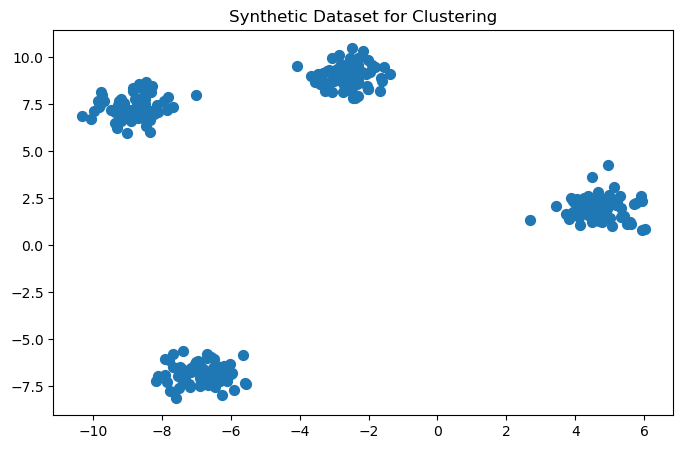

In [3]:
# Create synthetic dataset with 4 clusters
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

plt.figure(figsize=(8,5))
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Synthetic Dataset for Clustering")
plt.show()


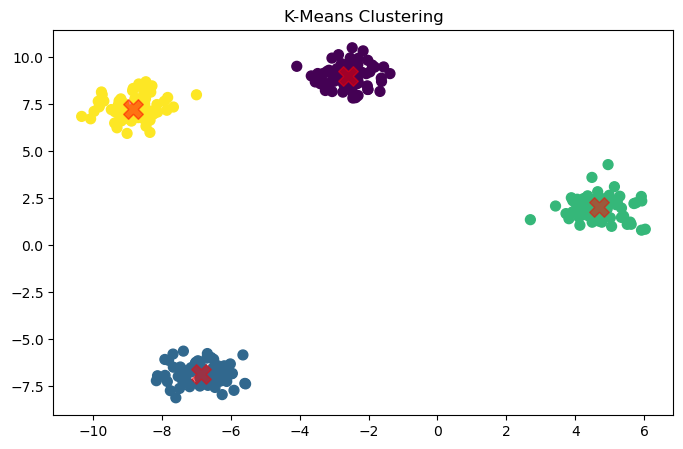

In [8]:
# Fit K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Plot clusters
plt.figure(figsize=(8,5))
plt.scatter(X[:,0], X[:,1], c=y_kmeans, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=200, alpha=0.5, marker='X')
plt.title("K-Means Clustering")
plt.show()


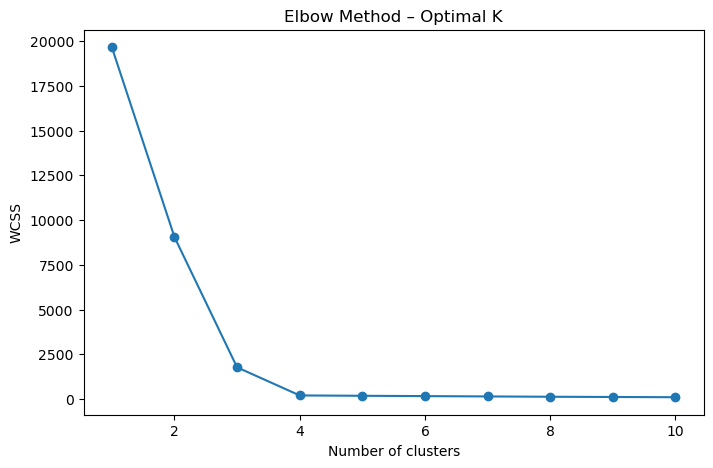

In [9]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, marker='o')
plt.title("Elbow Method – Optimal K")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()


### Hierarchical Clustering Theory
- Builds a hierarchy of clusters using either:
    1. **Agglomerative** (bottom-up): start with each point as a cluster → merge closest pairs
    2. **Divisive** (top-down): start with all points in one cluster → split recursively
- Results visualized as a **dendrogram**.
- Distance metrics: Euclidean, Manhattan, Cosine
- Linkage methods: single, complete, average, ward


In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

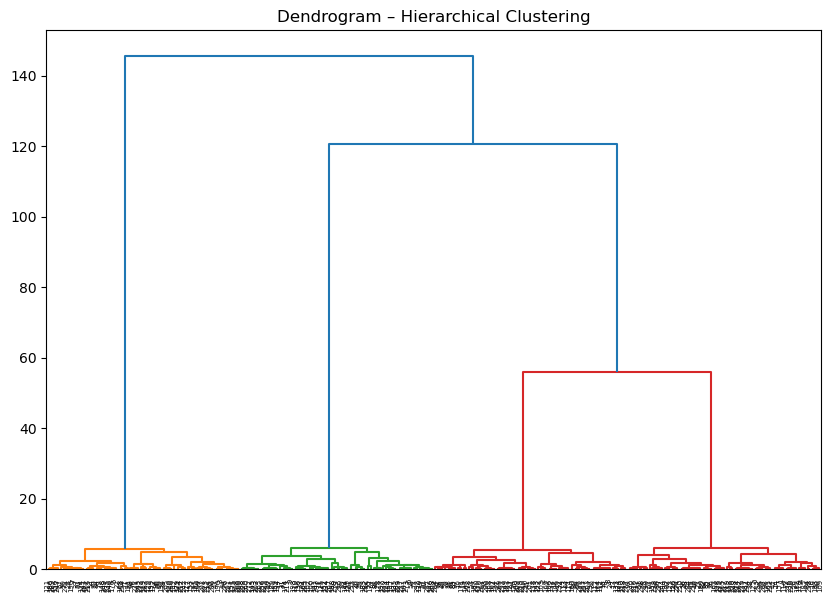

In [11]:
# Linkage matrix
linked = linkage(X, method='ward')  # Ward minimizes variance within clusters

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='ascending', show_leaf_counts=True)
plt.title("Dendrogram – Hierarchical Clustering")
plt.show()


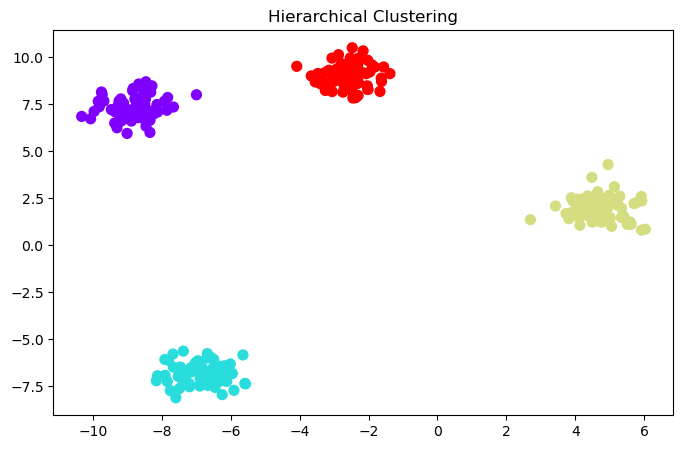

In [14]:
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

plt.figure(figsize=(8,5))
plt.scatter(X[:,0], X[:,1], c=y_hc, cmap='rainbow', s=50)
plt.title("Hierarchical Clustering")
plt.show()


In this notebook, we explored **unsupervised learning** techniques for clustering data, focusing on **K-Means** and **Hierarchical Clustering**.

### Key Points:
1. **K-Means Clustering**
   - Efficient for large datasets.
   - Requires predefining the number of clusters (k).
   - Centroids are used to assign points to clusters.
   - Elbow method helps identify the optimal k.
   
2. **Hierarchical Clustering**
   - Builds a hierarchy of clusters visualized through **dendrograms**.
   - Does not require predefining the number of clusters (though can cut dendrogram at a desired level).
   - Agglomerative (bottom-up) approach merges closest points iteratively.

3. **Applications**
   - Customer segmentation, market analysis, image compression, anomaly detection, and more.
   - Cluster interpretation is crucial since unsupervised methods do not provide labels.

4. **Insights**
   - Visualization is key for interpreting clusters.
   - Combining K-Means and Hierarchical Clustering provides both efficiency and insights into the data structure.
   - Proper scaling and preprocessing of data improves clustering performance.

Overall, clustering is a **powerful unsupervised learning technique** that helps uncover hidden patterns and relationships in data, forming a foundation for more advanced AI/ML tasks like recommendation systems, RAG pipelines, and vector search optimization.
